# Python Polynomial Linear Regression

Here I am attempting to create a polynomial regressor for a dataset, and I will outlay my reasons for choosing a specific polynomial degree.

**This is a preformatted text space**

### Preprocess data

In [1]:
import numpy as np;
import random;


#['Position','Level','Salary']
position_salaries=[
    ['Business Analyst',1,45000],
    ['Junior Consultant',2,50000],
    ['Senior Consultant',3,60000],
    ['Manager',4,80000],
    ['Country Manager',5,110000],
    ['Region Manager',6,150000],
    ['Partner',7,200000],
    ['Senior Partner',8,300000],
    ['C-level',9,500000],
    ['CEO',10,1000000]
];

# Make sure we randomise so that our training and testing data has no sampling bias
random.shuffle(position_salaries);

### Convert to polynomial dataset

In order to perform polynomial regression we need to add extra exponential increases of the X values to our dataset.

In [2]:
# The input space is the 'Level' of employee
X = [row[1][1] for row in enumerate(position_salaries)]
# The output space is the salary of the employee
Y = [row[1][2] for row in enumerate(position_salaries)]


# Convert the X values into many dimensions where each dimension represents an x value raised to some degree
# we are only going to raise to 3rd degree polynonials however, just to keep things simple
# notice that we are also including value**0, this is because we are including a **constant** or y-intercept
# which should increase accuracy as well.
def get_polynomial_dataset(X, degree=1, include_bias=True):
    return [get_raised_set(value[1], degree, include_bias) for value in enumerate(X)];

def get_raised_set(X, degree, include_bias = False):
        transformed_set = [X**(d+1) for d in range(degree)];     

        if(include_bias):
            transformed_set.append(1);

        return transformed_set;

### Split into Test and Training data
So far we have mapped some data into our training and testing data object.

We have some **Y** which are our output values for which we are trying to estimate.

We also have our **X** values which are the "features" that we hope to use to model our ouputs.

We now need to create the following groups:
* Training
* Testing

We need the testing set of data to ensure that we are not overfitting our model to the testing data, and that we are able to properly generalize for cases outside of the testing data.

*Later on we will cross validate and ensure that we are choosing the correct capacity [also known as degree] for our polynomial regression*

In [25]:
# get train 
def get_train_x(X):
    return X;

def get_train_y(Y):
    return Y;

def get_test_y(Y):
    return Y;

def get_test_x(X):
    return X;

# split up the training and testing data 80/20
def get_train_test_data(X,Y):
    return [
        get_train_x(X), # training data
        get_test_x(X), # test
        get_train_y(Y), # training
        get_test_y(Y)  # test
    ];

### Create learning function

Create a simple gradient descent function for minimizing loss of our training set.

Here is our loss function that we are trying to minimize.

```loss = 1/size_of_training_set * Sum(((transposed_weights * x) - y)^2)```

This is how we could calculate the udpated gradients for weights with respect to all the dimensions of X (*'wieght_d'* is the coefficient for dimension d, _'xi'_ = row of x, _'xd'_ is the dimension of x).

```weight_d = weight_d - learning_rate*xd*(y - xi * weight_i)```

In [26]:
# get the loss measure
def get_loss(w, x, y):
    # Divide by the total size of the data to get the average
    return get_sum_sqaured_error(w, x, y)/len(y)

def get_sum_sqaured_error(w,x,y):
    error = 0;
    for index, row in enumerate(x):
        error = error + get_error(w,row,y[index])**2;
    return error;

def get_error(w, x, y):
    return y - np.dot(w, x);

def get_gradient(w,x,y, data_size = 1):
    error = get_error(w,x,y);
    return (-2/data_size)*error;

#update the gradient for all coefficients for some coordinate set
def update_gradients(w, x, y, learning_rate):
    updated_gradients = np.zeros(len(x[0]));
    current_gradients = w;
    data_size = len(y);
    for i,row in enumerate(x):
        gradient = get_gradient(current_gradients,row,y[i], data_size);
        for j, coefficient in enumerate(w):
            updated_gradients[j] += row[j]*gradient;
    # update all of the coefficients at the same time
    #learning_matrix = np.identity(len(updated_gradients))*learning_rate;
    current_gradients = current_gradients - updated_gradients*learning_rate
    # Return the new set of coefficients
    return current_gradients;

# Creates a model using linear regression for a set of Xs, and Ys
# Also plots the loss over time and validates against the test data
def polynomial_linear_regression(x, y, step_size = 0.01):
    iterations = int(1/step_size) # number of iterations should be inversely proportional to the step size
    learning_rate = step_size
    model = np.ones(len(x[0]));
    
    for iteration in range(iterations):
        model = update_gradients(model, x, y, learning_rate);
    return model;

### Map out the Generalization Error

In [27]:
import matplotlib.pyplot as plt;


def fx(X, degree, include_bias, model):
    x = get_raised_set(X, degree, include_bias);
    return np.dot(np.transpose(model), x);

def plot_polynomial_regression_degree(degree=1, include_bias=True):
    step_size = 1/10**(2*degree) # step_size should be inversely proportional to the degree of the polynomial
    d_x = get_polynomial_dataset(X, degree, include_bias);
    d_data = get_train_test_data(d_x, Y);

    d_x_train = d_data[0];
    d_x_test = d_data[1];

    d_y_train = d_data[2];
    d_y_test = d_data[3];

    d_model = polynomial_linear_regression(d_x_train, d_y_train, step_size)
    x_train = get_train_x(X);
    x_train.sort();
    d_y_train.sort();
    plt.plot(x_train, d_y_train, 'ro-');
    x = np.linspace(0, 12, 1000);
    plt.plot(x, [fx(x, degree, include_bias, d_model) for index,x in enumerate(x)], 'go-');
    plt.xlim(0, 12);
    plt.ylim(0, 1000000);
    plt.show()

### Create Compare Different Degrees

**First Degree Polynomial Linear Regression (with bias)**

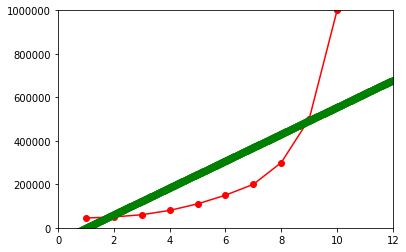

In [28]:
plot_polynomial_regression_degree(1, include_bias=True);

**Second Degree Polynomial (with bias)**

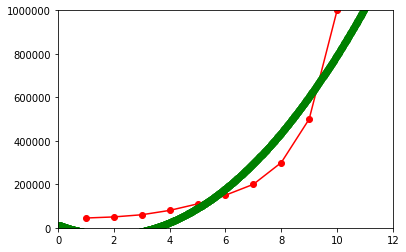

In [29]:
plot_polynomial_regression_degree(2, include_bias=True);

**Third Degree Polynomial (with bias)**

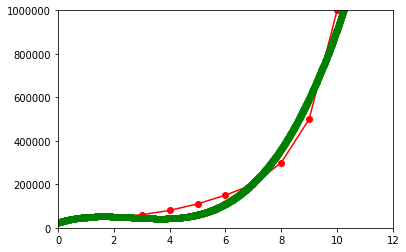

In [30]:
plot_polynomial_regression_degree(3,True);